IMPORTS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

ModuleNotFoundError: No module named 'library'

LOAD DATA

In [ ]:
# uploading day data
bike_data = pd.read_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/day.csv')

In [ ]:
bike_data.info


In [ ]:
bike_data.head()

In [ ]:
# Distribution of counts (average) per season and weathersit...
# let's look at the count summary per each season of 2 years...

season_data = bike_data[['season', 'cnt']]
season_data.head()


In [ ]:
season_data.groupby(by = 'season').cnt.sum()

In [ ]:
#distribution of average bike rental counts per season and weather situation
season_avg_count = bike_data.groupby(by = 'season').cnt.mean()
weathersit_avg_count = bike_data.groupby(by = 'weathersit').cnt.mean()
#Create two subplots on 2 rows and 1 column with a figsize of (12, 12)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
season_avg_count.plot(kind= 'barh', ax=ax[0])
ax[0].set_title('season')
ax[0].set_xlabel('Count')
weathersit_avg_count.plot(kind='barh', ax=ax[1])
ax[1].set_title('weather situation')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);


In [ ]:
#distribution of bike rental counts by holidays

holiday_avg_count = bike_data.groupby('holiday').cnt.mean()
workday_avg_count = bike_data.groupby('workingday').cnt.mean()

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
holiday_avg_count.plot(kind= 'barh', ax=ax[0])
ax[0].set_title('holiday and non holiday')
ax[0].set_xlabel('Count')

workday_avg_count.plot(kind='barh', ax=ax[1])
ax[1].set_title('Weekday Distribution')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);

In [ ]:
#people use bikes less when it's not a workday.  But the difference seems small especially between weekend and weekdays.

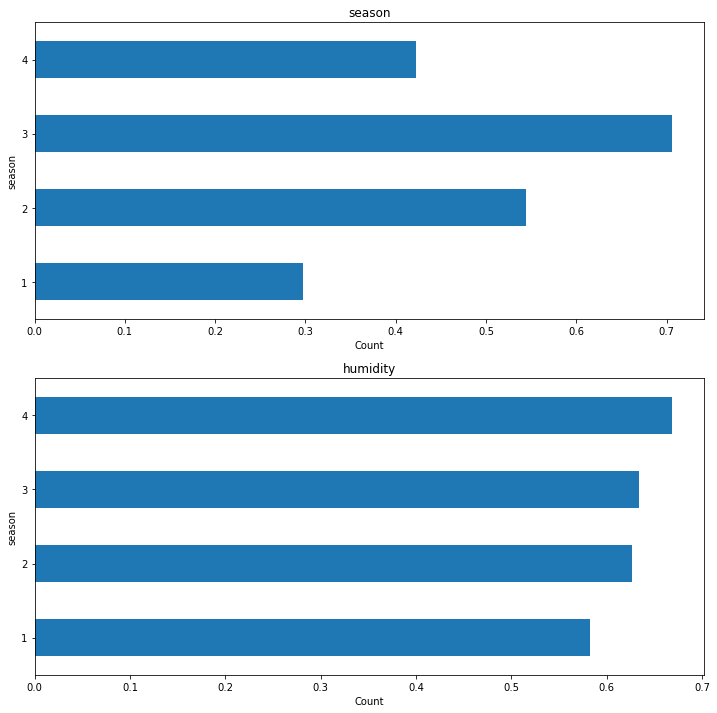

In [64]:
#now let's focus on distribution of average temperature and humidity per seasons
season_avg_temp = bike_data.groupby(by = 'season').temp.mean()
season_avg_hum = bike_data.groupby(by = 'season').hum.mean()
#Create two subplots on 2 rows and 1 column with a figsize of (12, 12)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
season_avg_temp .plot(kind= 'barh', ax=ax[0])
ax[0].set_title('average temp')
ax[0].set_xlabel('Count')
season_avg_hum .plot(kind='barh', ax=ax[1])
ax[1].set_title('avergage humidity')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);

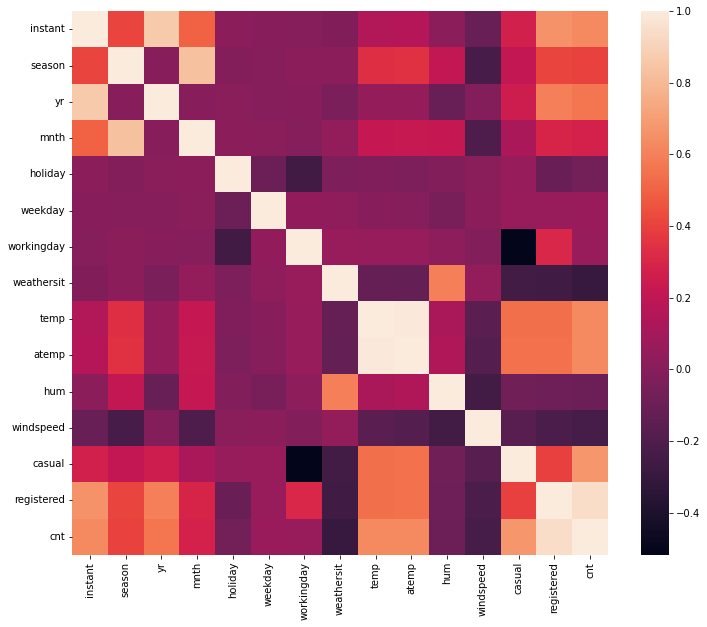

In [72]:
#let's do a heatmap to see the correlations of the values

plt.subplots(figsize=(12,10))
sns.heatmap(bike_data.corr());

In [ ]:
#windspeed together weather situation seem to be highly correlated to count of bike rentals

In [73]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'cnt', data=bike_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='bike count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [75]:
features = [f for f in bike_data.columns if f not in ['instant', 'registered', 'state', 'AdultWeekend']]

In [ ]:
# 2012 has 25 percent more rentals than 2011. We can compare weather situation and temp to investigate if 
##it's weather related or marketing.
#Between temp 03 and 0.7 the bike rentals seem to be more common. Also if the windspeed is 0.4 or more
## the rentals are rare.


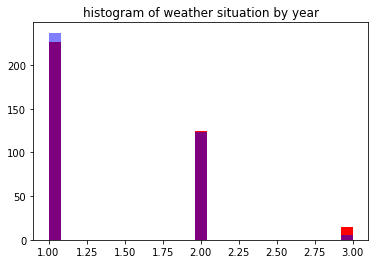

In [82]:
plt.hist(bike_data[bike_data['yr'] == 0].weathersit ,bins = 25, alpha = 0.5, 
         color = 'red')
plt.hist(bike_data[bike_data['yr'] == 1].weathersit ,bins = 25, alpha = 0.5,
         color = 'blue')
  
plt.title("histogram of weather situation by year")
  
plt.show()

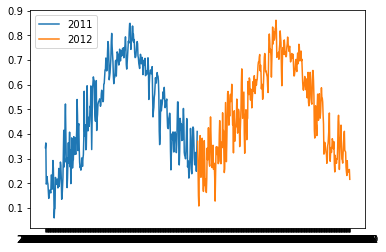

In [93]:
##v2011 had more precipitation but weather situation seems to be very similar in both of the years.
bike_2011 = bike_data [bike_data ['yr'] == 0]
bike_2012 = bike_data [bike_data ['yr'] == 1]

plt.plot( 'dteday', 'temp', data = bike_2011, label = '2011') 
plt.plot( 'dteday', 'temp', data = bike_2012, label = '2012') 
plt.legend()

plt.show()

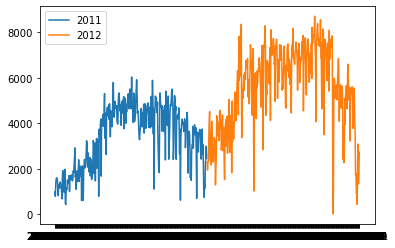

In [94]:
#2011 was colder both in winter and summer but it generally looks smilar temperature wise.


plt.plot( 'dteday', 'cnt', data = bike_2011, label = '2011') 
plt.plot( 'dteday', 'cnt', data = bike_2012, label = '2012') 
plt.legend()

plt.show()

In [ ]:
##2011 had much less bike rentals and it seems like this was not motivated by weather but by 'newness' of the company
#which should apply also to Philadelphia branch since it will be their first operational year. We should continue with 
#2011. Taking into account windspeed, temp, season and weather situation...